In [6]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime
import sklearn.ensemble
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score as CVS
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression    # LogReg Funktion. Ein gutes tool für prediktive Analyse + erklärt Beziehung mehrerer Variabeln.
from sklearn.metrics import confusion_matrix           # Für die Konfusionsmatrix (True/ False - Positive/ Negative)
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score             # Für die Evaluation der Genauigkeit des Modells.
from sklearn.metrics import classification_report      # Für den classification report
from pandas.plotting import scatter_matrix             # Für eine scatter matrix (falls benutzt)
from sklearn.model_selection import GridSearchCV       # Für das Hyperparametertuning mit GridSearchCV
from scipy.stats import randint                        # Für randomization
from sklearn.tree import DecisionTreeClassifier        # Für den Entscheidungsbaum
from sklearn.model_selection import RandomizedSearchCV # Für RandomizedSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Teilnehmerinformationen

In [7]:
# Teilnehmerinformationen
teilnehmer = "Mahmoud Kanan"
datensatz ="Credit Card Customers"

# Ausgabe der Teilnehmerinformationen
print(f"Präsentator: {teilnehmer}")
print(f"Verwendeter Datensatz: {datensatz}")

Präsentator: Mahmoud Kanan
Verwendeter Datensatz: Credit Card Customers


# Geschäftsproblem

In [8]:
# Geschäftsproblem: Proaktive Verbesserung der Kundendienste durch Kündigungsvorhersage
# In diesem Szenario möchte die Bank in der Lage sein, vorherzusagen, welche Kunden ihre Kreditkartendienste kündigen werden.
# Das Ziel besteht darin, frühzeitig zu reagieren, bessere Dienstleistungen anzubieten und die Entscheidungen der Kunden positiv zu beeinflussen.

Geschäftsproblem = "Die Bank strebt an, Kundenkündigungen im Voraus vorherzusagen, um proaktiv bessere Dienstleistungen anzubieten und die Kundenentscheidungen zu beeinflussen."
print(Geschäftsproblem)


Die Bank strebt an, Kundenkündigungen im Voraus vorherzusagen, um proaktiv bessere Dienstleistungen anzubieten und die Kundenentscheidungen zu beeinflussen.


# Daten importieren

In [9]:
# Daten importieren
df = pd.read_csv('BankChurners.csv')
# Ausgabe der Erfolgsmeldung und Anzahl der Zeilen und Spalten im Dataset
print('Datensatz erfolgreich importiert!\n')
#"\n" ist ein sogenannter Escape-Code 
print('Der Datensatz enthält {} Zeilen und {} Spalten.'.format(df.shape[0], df.shape[1]))
# Ausgabe der ersten fünf Zeilen des Datensatzes
df

Datensatz erfolgreich importiert!

Der Datensatz enthält 10127 Zeilen und 23 Spalten.


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [10]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

# Exploratory Data Analysis (EDA)


In [11]:
missing_data = df.isnull().sum()
print("Fehlende Daten:")
print(missing_data)

Fehlende Daten:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                 

In [12]:
# Entfernen der angegebenen Spalten aus dem DataFrame
# df = df.drop(['Spalte1', 'Spalte2'], axis=1)
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
# Anzeigen der ersten 2 Zeilen des aktualisierten DataFrames
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [13]:
df[df['CLIENTNUM'].duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [14]:
# Es gibt die Daten, die sich wiederholt haben, aber sind nicht so Wert wie die CLIENTNUM und Kundendaten was bedeutet, dass wir keine Kunde zweimal gemeldet wurde.
#nur die CLIENTNUM ist nicht wiederholt und das ist uns wichtig. 
df[df[["Customer_Age","Gender","Education_Level","Marital_Status"]].duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
41,758551608,Existing Customer,51,M,2,Unknown,Married,$40K - $60K,Blue,44,...,1,0,6205.0,2204,4001.0,0.803,1347,28,0.556,0.355
56,716632758,Existing Customer,49,F,3,Graduate,Single,Less than $40K,Blue,36,...,2,0,2802.0,2363,439.0,0.750,1295,40,0.600,0.843
67,788730933,Existing Customer,44,F,2,Uneducated,Single,Less than $40K,Blue,20,...,3,3,2084.0,1468,616.0,1.004,1132,28,0.556,0.704
71,720096558,Existing Customer,55,F,2,Graduate,Married,Less than $40K,Blue,42,...,3,3,2216.0,1034,1182.0,0.758,1540,36,0.286,0.467
80,715623483,Existing Customer,47,M,3,Graduate,Married,$60K - $80K,Blue,37,...,4,0,8567.0,1695,6872.0,1.242,1457,41,1.412,0.198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [16]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [17]:
# um zu überprufen wenn negative zahlen als Alt gegeben wurde
df["Customer_Age"].min()

26

In [18]:
# Liste für kategoriale Variablen erstellen(nur varailen, die nicht Zahlen sind )
cat_vars = [var for var in df.columns 
            if df[var].dtype == 'O' and var != 'Attrition_Flag']

# Liste für numerische Variablen erstellen(nur Zahlen)
num_vars = [var for var in df.columns
            if df[var].dtype != 'O']

print('Anzahl der kategorialen Variablen: {}'.format(len(cat_vars)))
print('Anzahl der numerischen Variablen: {}'.format(len(num_vars)))

Anzahl der kategorialen Variablen: 5
Anzahl der numerischen Variablen: 15


In [19]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [20]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [21]:

#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()

#list of all the categoric columns
objekt = df.select_dtypes('object').columns.to_list()
# Weil "num" lange List ist,zeigen wir es nicht.
'''for i in num:
    print(f"{i}:\n {df[i].unique()}\n\n")'''

for i in objekt:
    print(f"{i}:\n {df[i].unique()}\n\n")

Attrition_Flag:
 ['Existing Customer' 'Attrited Customer']


Gender:
 ['M' 'F']


Education_Level:
 ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


Marital_Status:
 ['Married' 'Single' 'Unknown' 'Divorced']


Income_Category:
 ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


Card_Category:
 ['Blue' 'Gold' 'Silver' 'Platinum']




# Funktionen

In [22]:
def plot_pie(df,column):
    counts = df[column].value_counts()
    labels = counts.index
    sizes = counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Verteilung der {column}')
    plt.show()

# Funktion zur Darstellung eines Histogramms mit genauen Zahlen
def plot_histogram(df,column):
    counts = df[column].value_counts()
    labels = counts.index
    values = counts.values
    fig, ax = plt.subplots(figsize=(18, 6))  # Größe des Diagramms anpassen
    plt.bar(labels, values, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Anzahl')
    plt.title(f'Histogramm - {column}')

    for label, value in zip(labels, values):
        plt.text(label, value, f'{value} ({value/df.shape[0]*100:.1f}%)', ha='center', va='bottom')

    plt.show()

    # generates visualizations for continuous features
def cont_feature_graphs(df,column):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    sns.boxplot(data=df, x=column, y='Attrition_Flag', orient='h', ax=axs[0])
    sns.kdeplot(data=df, x=column, hue='Attrition_Flag', common_norm=False, ax=axs[1])
    axs[0].set_ylabel('')
    axs[1].set_ylabel('')
    plt.show()
    
    # visualizations for categorical features
def cat_feature_graphs(df,column):
    counts = df[column].value_counts() # calculate the counts by education level
    attrition_rates = attrited_customers[column].value_counts() / df[column].value_counts() # attrition rate by education level
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    sns.barplot(x=attrition_rates.sort_values().index, y=attrition_rates.sort_values(), ax=axs[0])
    sns.barplot(x=counts.sort_values().index, y=counts.sort_values(), ax=axs[1])
    axs[0].set_ylabel('')
    axs[0].set_title('Attrition Rates')
    axs[1].set_ylabel('')
    axs[1].set_title('Counts')
    plt.show()
    



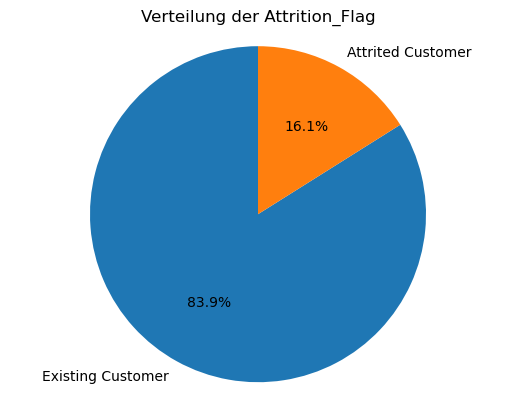

In [23]:
# Aufruf der Funktionen für die Spalte 'Attrition_Flag'
plot_pie(df,'Attrition_Flag')

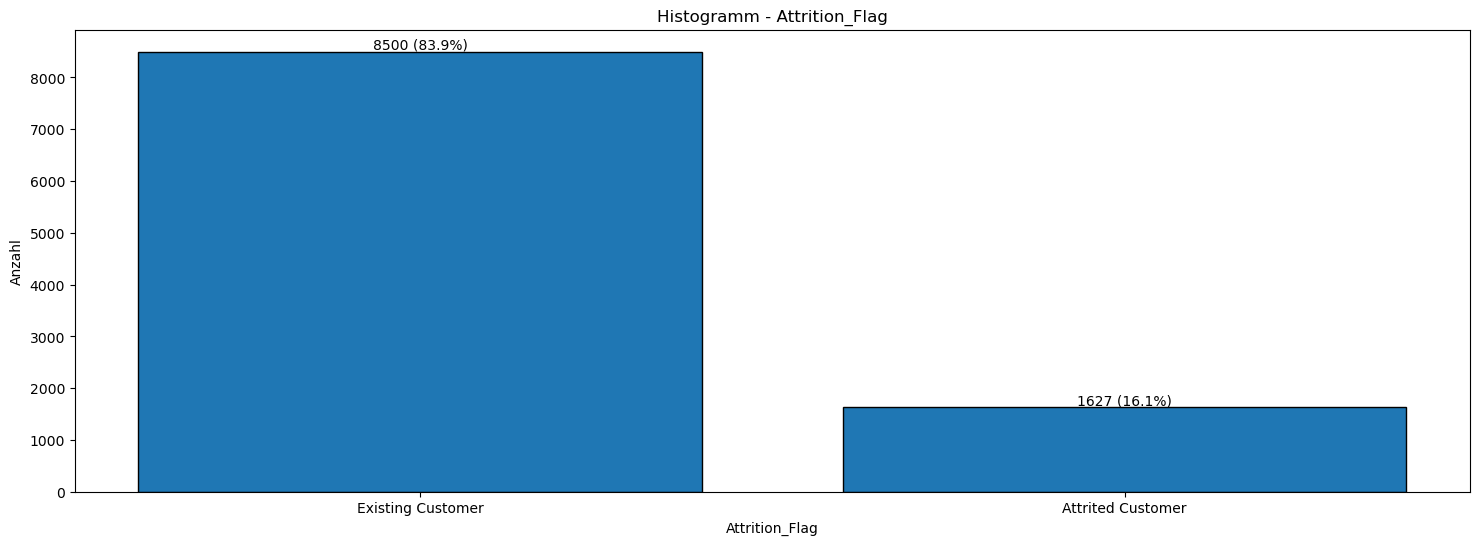

In [24]:
# Aufruf der Funktion für die Spalte 'Attrition_Flag'
plot_histogram(df,'Attrition_Flag')



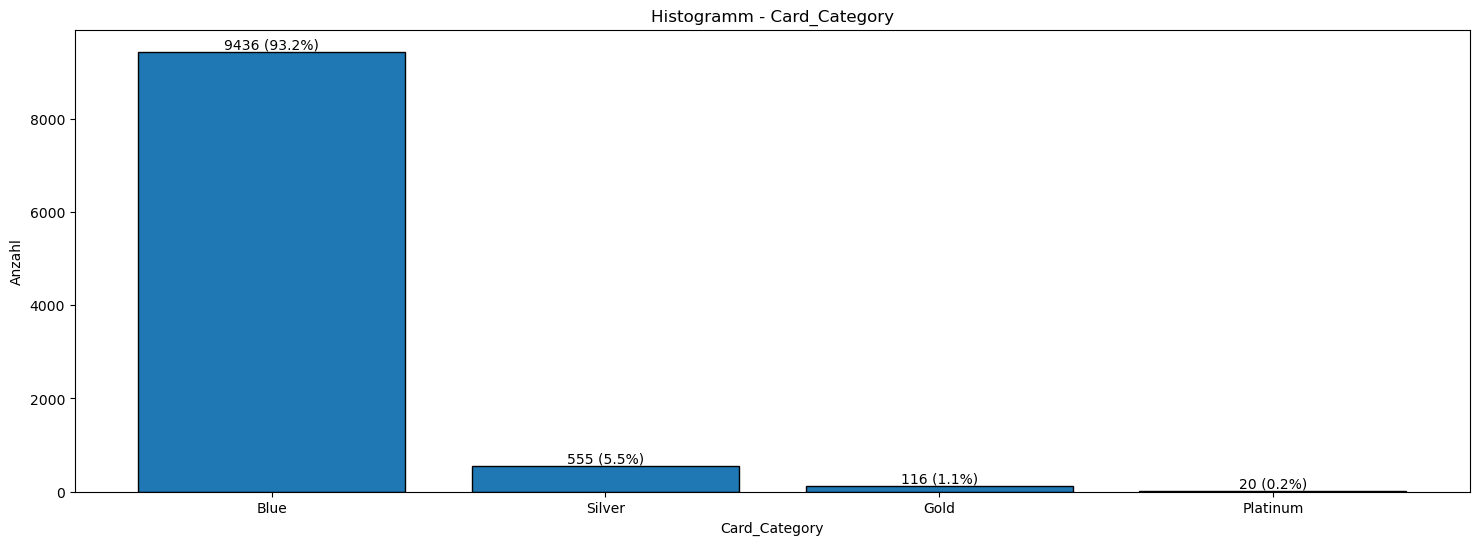

In [25]:
# Aufruf der Funktion für die Spalte'Card_Category'
plot_histogram(df,'Card_Category')

In [26]:
# Filtern des DataFrames für gekündigte Kunden
df_gekündigt = df[df['Attrition_Flag'] == 'Attrited Customer'].copy()

# Filtern des DataFrames für bestehende Kunden
df_bestehende_Kunden = df[df['Attrition_Flag'] =='Existing Customer'].copy()


In [27]:
df_bestehende_Kunden

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,...,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164


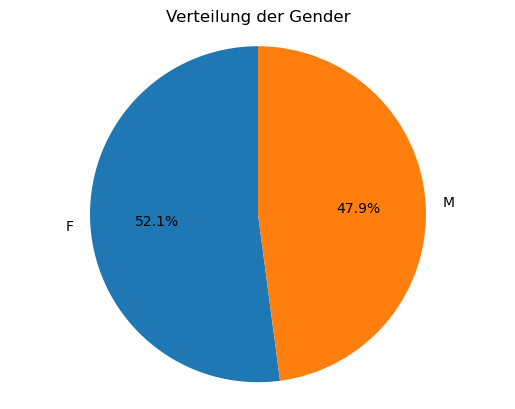

In [28]:
# Aufruf der Funktion für die Spalte 'Customer_Age'
plot_pie(df_bestehende_Kunden,'Gender')

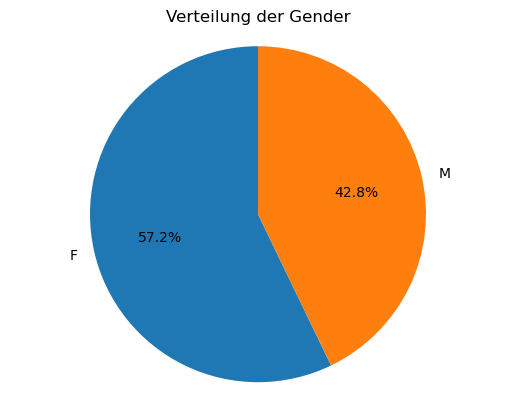

In [29]:
plot_pie(df_gekündigt,'Gender')

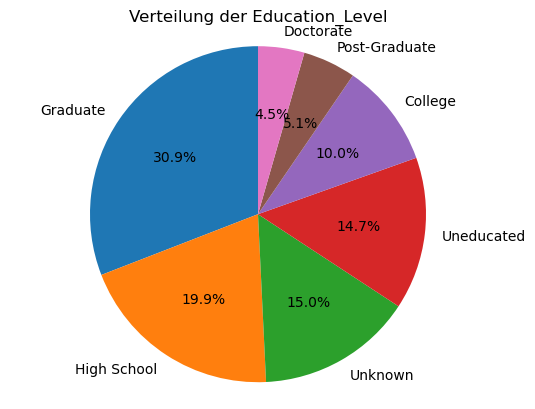

In [30]:
plot_pie(df,'Education_Level')

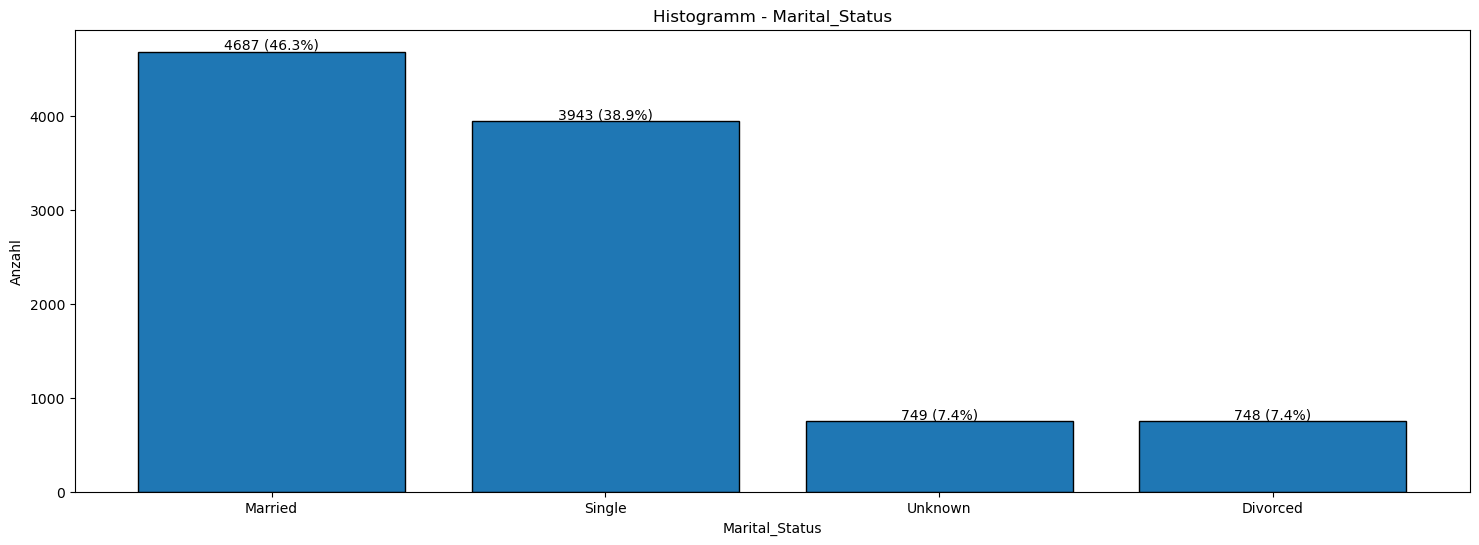

In [31]:
# Aufruf der Funktion für die Spalte 'Marital_Status'
plot_histogram(df,'Marital_Status')

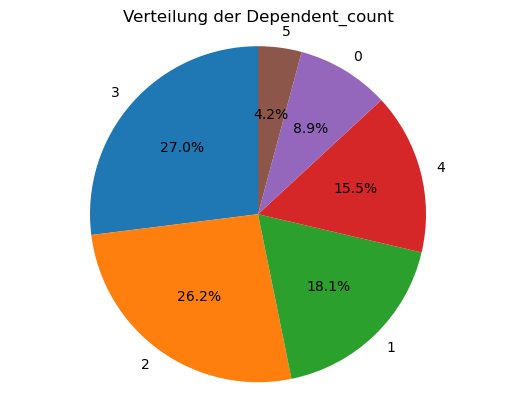

In [32]:
plot_pie(df,'Dependent_count')

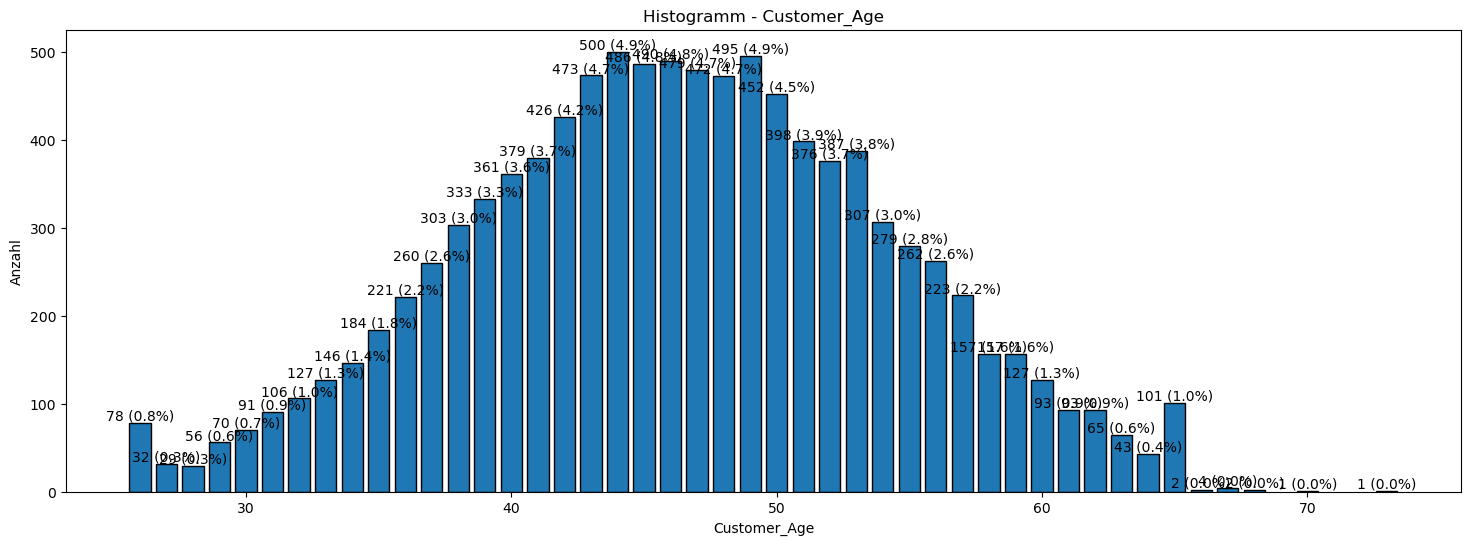

In [33]:
plot_histogram(df,'Customer_Age')

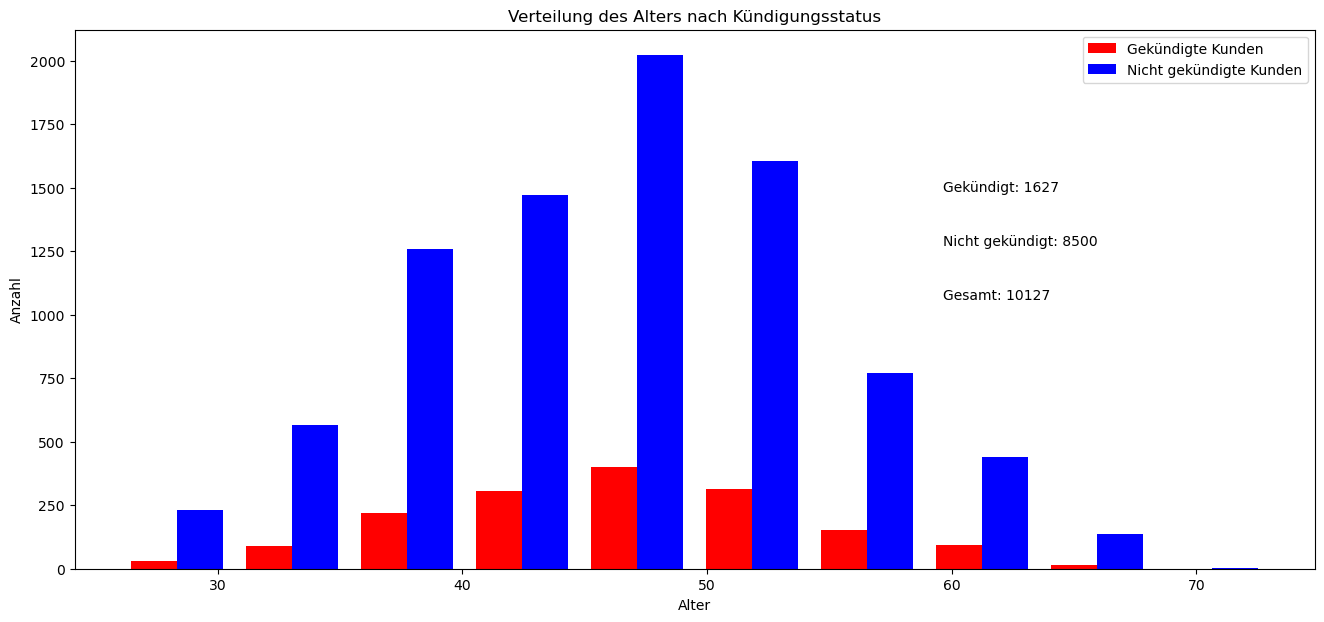

In [34]:
# Filtern der Daten für gekündigte und nicht gekündigte Kunden
gekündigte_kunden = df[df['Attrition_Flag'] == 'Attrited Customer']
bestehende_kunden = df[df['Attrition_Flag'] == 'Existing Customer']

# Alter der gekündigten Kunden
alter_gekündigt = gekündigte_kunden['Customer_Age']
anzahl_gekündigt = alter_gekündigt.count()

# Alter der nicht gekündigten Kunden
alter_bestehend = bestehende_kunden['Customer_Age']
anzahl_bestehend = alter_bestehend.count()

# Balkendiagramm erstellen
plt.figure(figsize=(16, 7))
plt.hist([alter_gekündigt, alter_bestehend], bins=10, color=['red', 'blue'], label=['Gekündigte Kunden', 'Nicht gekündigte Kunden'])

plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.title('Verteilung des Alters nach Kündigungsstatus')

# Anzeige der genauen Zahlen über jedem Balken
plt.text(0.7, 0.7, f'Gekündigt: {anzahl_gekündigt}', transform=plt.gca().transAxes)
plt.text(0.7, 0.6, f'Nicht gekündigt: {anzahl_bestehend}', transform=plt.gca().transAxes)
plt.text(0.7, 0.5, f'Gesamt: {anzahl_gekündigt + anzahl_bestehend}', transform=plt.gca().transAxes)

plt.legend()
plt.show()

## Objekt zu Encoder: Numerische Umwandlung

In [35]:
churn_map = {'Existing Customer': 0,
            'Attrited Customer': 1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(churn_map)

In [36]:
# Encode the categorical data
encoder = LabelEncoder()
for column in ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]:
    df[column] = encoder.fit_transform(df[column])

In [37]:
# codierung überprüfung 
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,2,2,1,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,2,6,0,1,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,0,1,3,1,4,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,2,2,3,1,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# Korrelationsmatrix
Die Korrelationsmatrix zeigt die lineare Beziehung zwischen verschiedenen numerischen Variablen im DataFrame an.

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,-0.046430,0.007613,0.020188,0.006772,-0.003789,-0.003284,-0.025802,0.007511,0.134588,...,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Attrition_Flag,-0.046430,1.000000,0.018203,-0.037272,0.018991,0.005551,0.018597,0.017584,-0.006038,0.013687,...,0.152449,0.204491,-0.023873,-0.263053,-0.000285,-0.131063,-0.168598,-0.371403,-0.290054,-0.178410
Customer_Age,0.007613,0.018203,1.000000,-0.017312,-0.122254,0.004083,-0.011265,-0.013474,-0.020131,0.788912,...,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Gender,0.020188,-0.037272,-0.017312,1.000000,0.004563,0.000694,-0.000007,-0.539731,0.079203,-0.006728,...,-0.011163,0.039987,0.420806,0.029658,0.418059,0.026712,0.024890,-0.067454,-0.005800,-0.257851
Dependent_count,0.006772,0.018991,-0.122254,0.004563,1.000000,0.003788,0.000337,-0.035417,0.021674,-0.103062,...,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Education_Level,-0.003789,0.005551,0.004083,0.000694,0.003788,1.000000,0.014720,-0.010442,-0.007212,-0.004953,...,-0.008077,0.008500,0.003076,0.008029,0.002356,0.005534,0.015287,0.003046,0.007279,0.006477
Marital_Status,-0.003284,0.018597,-0.011265,-0.000007,0.000337,0.014720,1.000000,0.009659,0.035947,-0.012084,...,0.001709,0.001476,0.031292,-0.025386,0.033562,-0.036210,0.044553,0.075888,0.000258,-0.027451
Income_Category,-0.025802,0.017584,-0.013474,-0.539731,-0.035417,-0.010442,0.009659,1.000000,-0.051632,-0.016375,...,0.024037,-0.018367,-0.225394,-0.025815,-0.223033,-0.004534,-0.014686,0.033498,0.014892,0.123287
Card_Category,0.007511,-0.006038,-0.020131,0.079203,0.021674,-0.007212,0.035947,-0.051632,1.000000,-0.014749,...,-0.016816,-0.000919,0.484090,0.017027,0.482462,0.004061,0.176377,0.116579,-0.004541,-0.205089
Months_on_book,0.134588,0.013687,0.788912,-0.006728,-0.103062,-0.004953,-0.012084,-0.016375,-0.014749,1.000000,...,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541


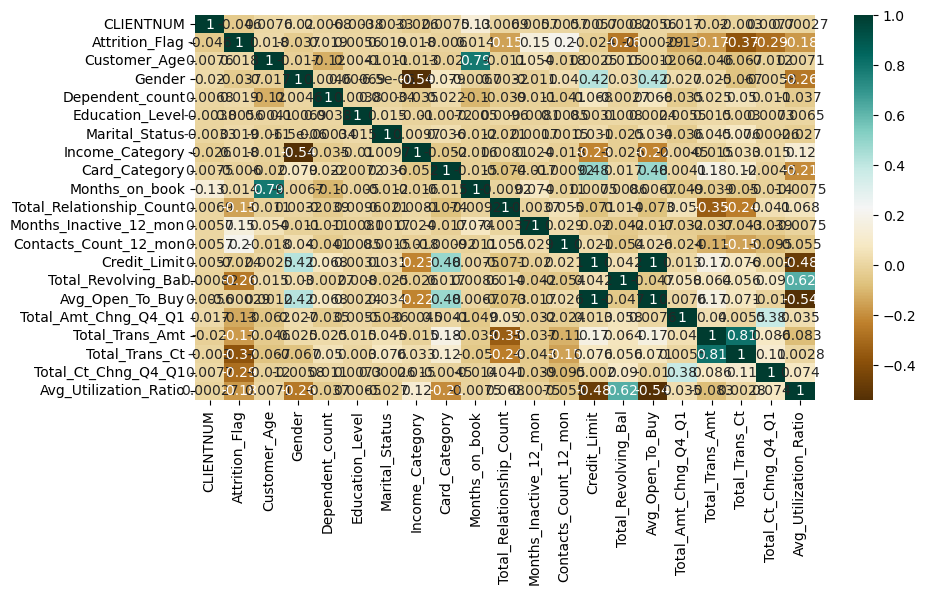

In [38]:
# Erstellen eines neuen Figure-Objekts mit den angegebenen Abmessungen
plt.figure(figsize=(10, 5))

# Berechnen der Korrelationsmatrix für die Variablen im DataFrame
c = df.corr()

# Erstellen einer Heatmap aus der Korrelationsmatrix
# Die Option `cmap="BrBG"` verwendet eine Farbskala, die die Korrelationen von schwach (blau) bis stark (rot) darstellt.
# Die Option `annot=True` fügt die Korrelationskoeffizienten zu den Zellen der Heatmap hinzu.
sns.heatmap(c, cmap="BrBG", annot=True)

# Ausgabe der Korrelationsmatrix
c

In [39]:
# Berechnung des prozentualen Anteils der gekündigten und nicht gekündigten Kunden
# Formel: (Anzahl der gekündigten Kunden / Gesamtanzahl Kunden) * 100
prozentsatz_gekündigt = df['Attrition_Flag'].value_counts() / len(df) * 100

In [40]:
# Erstelle die Variable X, die den Trainingsdatensatz enthält
X = df.drop("Attrition_Flag", axis=1)

# Erstelle die Variable y, die den Zieldatensatz enthält
y = df["Attrition_Flag"]

In [41]:
X

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [42]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [43]:
# Anschließend teilen wir die Daten in Trainings- und Testsets auf (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Zeige die Ergebnisse der Aufteilung
print("Das Trainingsset enthält {} Beispiele.".format(X_train.shape[0]))
print("Das Testset enthält {} Beispiele.".format(X_test.shape[0]))

Das Trainingsset enthält 8101 Beispiele.
Das Testset enthält 2026 Beispiele.


# Machine Learning-Modelle

In [44]:
# Unten sind die Klassifikationsmodelle, die wir verwenden werden
classifiers = {
    "Logistic Regression": LogisticRegression(),  # Ein lineares Modell für binäre Klassifikation
    "K-Nearest Neighbors": KNeighborsClassifier(),  # Klassifizierung basierend auf der Mehrheit der k nächsten Nachbarn
    "Support Vector Classifier": SVC(),  # Trennung der Klassen durch einen Hyperplane im Merkmalsraum
    "Naive Bayes": GaussianNB(),  # Wahrscheinlichkeitsbasiertes Klassifikationsmodell
    "Decision Tree": DecisionTreeClassifier(),  # Baumstruktur zur Entscheidungsfindung basierend auf Merkmalswerten
    "Random Forest": RandomForestClassifier(),  # Ensemble von Entscheidungsbäumen für verbesserte Vorhersagegenauigkeit
    "AdaBoost": AdaBoostClassifier(),  # Boosting-Algorithmus, der schwache Modelle zu einem starken kombiniert
    "Gradient Boosting": GradientBoostingClassifier(),  # Iterative Verbesserung von Modellen durch Anpassung an Residuen
    "XGBoost": xgb.XGBClassifier()  # Extrem leistungsfähiges, optimiertes Gradient-Boosting-Framework
}

In [45]:
# Unterdrücke Warnungen für undefinierte Metriken und setze zero_division auf 1
warnings.simplefilter("ignore", category=UndefinedMetricWarning, append=True)

# Listen für Modellnamen, Testgenauigkeiten und F1-Scores erstellen
classifier_names = []
test_accuracy_scores = []
f1_scores = []

# Schleife durch die Klassifikationsmodelle
for name, model in classifiers.items():
    #dieser Code die Trainings- und Vorhersageschritte für ein Machine-Learning-Modell durch,
    #wobei die Trainingsdaten verwendet werden, um das Modell zu erstellen, 
    #und die Testdaten verwendet werden, um die Vorhersageleistung zu bewerten.
    # Modell an Trainingsdaten anpassen
    model.fit(X_train, y_train)
    
    # Vorhersagen für Testdaten erstellen
    y_pred = model.predict(X_test)
    
    # Modellnamen in die Liste einfügen
    classifier_names.append(name)
    
    # F1-Score berechnen und in die Liste einfügen
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    
    # Testgenauigkeit berechnen und in die Liste einfügen
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracy_scores.append(test_accuracy)

    # Printing model details
    print(f'Model: {name}')
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print('------------------------------------------------------------------')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('------------------------------------------------------------------')
    print(f'Testing Classification report:\n{classification_report(y_test, y_pred)}')
    print('------------------------------------------------------------------')

Model: Logistic Regression
Training Accuracy: 0.8373040365386989
Testing Accuracy: 0.8474827245804541
------------------------------------------------------------------
Testing Confusion Matrix: 
[[1717    0]
 [ 309    0]]
------------------------------------------------------------------
Testing Classification report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1717
           1       0.00      0.00      0.00       309

    accuracy                           0.85      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.72      0.85      0.78      2026

------------------------------------------------------------------


AttributeError: 'Flags' object has no attribute 'c_contiguous'

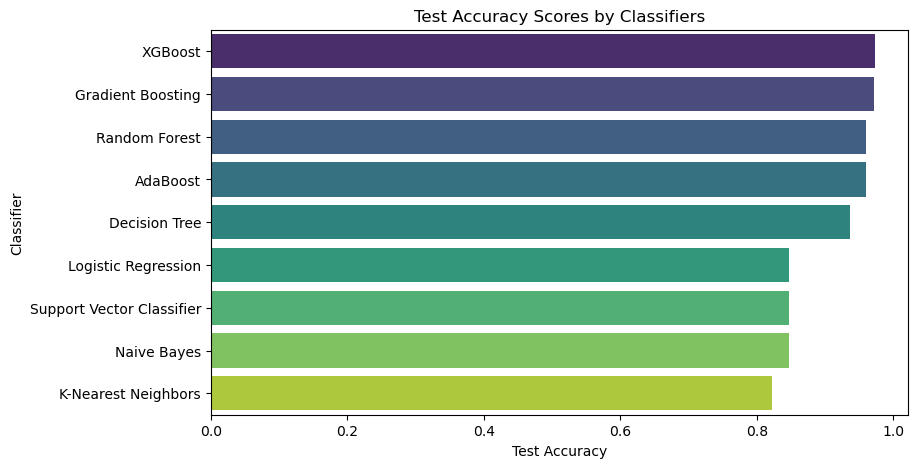

In [ ]:
# Erstelle ein Pandas DataFrame mit den Classifier-Namen und den Test Accuracyswerten

data = pd.DataFrame({'Classifier': classifier_names, 'Test Accuracy': test_accuracy_scores})

# Sortiere das DataFrame nach  'Test Accuracy' in absteigender Reihenfolge
data = data.sort_values(by='Test Accuracy', ascending=False)

# Erstelle ein horizontales Balkendiagramm mit Seaborn
plt.figure(figsize=(9, 5))
ax = sns.barplot(data=data, x='Test Accuracy', y='Classifier', palette='viridis')
plt.title('Test Accuracy Scores by Classifiers')
plt.xlabel('Test Accuracy')
plt.ylabel('Classifier')

# Zeige das Diagramm an
plt.show()

In [ ]:
model = classifiers["XGBoost"] # 40 Kunden 
# model = classifiers["Gradient Boosting"] # 190 Kunden
# model = classifiers["K-Nearest Neighbors"] # 1417 Kunden

In [ ]:
 model.fit(X_train, y_train)
    
    # Vorhersagen für Testdaten erstellen
df["y_pred"] = model.predict(df.drop("Attrition_Flag", axis=1))

In [ ]:
# Auswahl der Zeilen im DataFrame 'df', bei denen die Vorhersage ('y_pred') den Wert 0 hat.
# Diese Variable enthält Kunden, bei denen die Vorhersage darauf hindeutet, dass sie nicht kündigen wollen.
k = df.loc[df["y_pred"] == 0]
kunden_die_kündigen_wollen = k

In [ ]:
# diesen Kunden werden uns verlassen 
k.loc[k["Attrition_Flag"]==1]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,y_pred
519,719443683,1,50,1,1,6,2,0,0,39,...,3,27512.0,2137,25375.0,1.048,1149,25,0.562,0.078,0
834,711147483,1,46,0,3,2,2,4,0,28,...,3,8551.0,1067,7484.0,0.931,1097,32,0.778,0.125,0
1257,720141408,1,49,0,2,2,2,4,0,31,...,2,5456.0,951,4505.0,0.737,1096,27,0.588,0.174,0
1278,712196508,1,46,0,3,3,2,5,0,34,...,3,29543.0,1164,28379.0,0.717,1015,27,0.350,0.039,0
2162,778693458,1,32,1,1,3,0,2,0,13,...,3,12616.0,0,12616.0,1.054,1376,29,0.611,0.000,0
2265,787463508,1,26,1,0,2,2,4,0,13,...,4,2469.0,2410,59.0,0.544,1027,20,0.176,0.976,0
2411,715319958,1,48,1,3,5,1,0,0,36,...,4,34516.0,787,33729.0,0.763,1312,32,0.600,0.023,0
2543,719146008,1,48,1,3,2,1,3,0,39,...,3,18672.0,2517,16155.0,0.799,1126,35,0.591,0.135,0
2853,821149008,1,52,1,2,2,2,3,0,48,...,4,34516.0,0,34516.0,0.539,1661,40,0.600,0.000,0
3424,715485483,1,39,0,5,2,1,4,0,36,...,3,3664.0,0,3664.0,0.419,1479,44,0.913,0.000,0


# Quelle: 

- https://medium.com/@yejizoeseoung/credit-card-customers-analysis-6a193f00c044
- https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-
- https://medium.com/data-folks-indonesia/10-things-to-do-when-
- https://www.kaggle.com/code/yonatanrabinovich/credit-card-customer-detection
- https://www.kaggle.com/code/kaushikmajumder/credit-card-customer-churn-prediction
